In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [7]:
df = pd.read_csv('final_clean_data.csv')

In [4]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [8]:
df.shape

(682, 26)

In [9]:
nominal_variables = ['gender', 'statement_freq', 'region']

In [10]:
continuous_variables = [col for col in df.columns.tolist() if col not in nominal_variables 
                       and col != 'loan_status']

In [11]:
len(continuous_variables)

22

In [12]:
onehot = OneHotEncoder(sparse = False)

In [13]:
onehot.fit(df[nominal_variables])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [14]:
onehot_transform = onehot.transform(df[nominal_variables])

In [15]:
onehot_transform.shape

(682, 13)

In [16]:
onehot.categories_

[array(['F', 'M'], dtype=object),
 array(['POPLATEK MESICNE', 'POPLATEK PO OBRATU', 'POPLATEK TYDNE'],
       dtype=object),
 array(['Prague', 'central Bohemia', 'east Bohemia', 'north Bohemia',
        'north Moravia', 'south Bohemia', 'south Moravia', 'west Bohemia'],
       dtype=object)]

In [17]:
#Create column transformer
data_transformer = ColumnTransformer(transformers = [
                                    ('continous', 'passthrough', continuous_variables),
                                    ('nominal', OneHotEncoder(sparse = False), nominal_variables)],
                                    remainder = 'drop'
                                   )

In [18]:
#Building a model

#Set X and y variables
X = df.drop(columns = ['loan_status'], axis = 1)
y = df['loan_status']

In [19]:
#Split data into train, test and val datasets (train, val, test set will be 60%, 20%, 20% of the dataset respectively)

#create train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42)

#create val dataset from the remaining train dataset
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.25, random_state = 42)

In [20]:
X_train.shape

(408, 25)

In [21]:
#fit the transformer
data_transformer.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('continous', 'passthrough',
                                 ['num_acct_users', 'client_age_years',
                                  'account_age_years', 'loan_age_years',
                                  'loan_amt', 'total_paid',
                                  'loan_tenure_months', 'total_payments',
                                  'monthly_payments', 'population',
                                  'No_municipals_pop_less_499',
                                  'No_municipals_pop_...
                                  'No_Cities', 'ratio_urban_pop',
                                  'average_salary', 'unemploy_rate_year95',
                                  'unemploy_rate_year96',
                                  'No_enterpreneurs_per_1000_pop',
                                  'No_crimes_commited_year95',
                          

In [22]:
data_transformer.named_transformers_['nominal'].categories_

[array(['F', 'M'], dtype=object),
 array(['POPLATEK MESICNE', 'POPLATEK PO OBRATU', 'POPLATEK TYDNE'],
       dtype=object),
 array(['Prague', 'central Bohemia', 'east Bohemia', 'north Bohemia',
        'north Moravia', 'south Bohemia', 'south Moravia', 'west Bohemia'],
       dtype=object)]

In [23]:
nominal_variables

['gender', 'statement_freq', 'region']

In [24]:
transformed_nominal_columns = ['gender_F','gender_M','statement_freq_POPLATEK_MESICNE',
                               'statement_freq_POPLATEK_PO_OBRATU','statement_freq_POPLATEK_TYDNE',
                               'region_Prague','region_central_Bohemia','region_east_Bohemia',
                               'region_north_Bohemia','region_north_Moravia','region_south_Bohemia',
                               'region_south_Moravia','region_west_Bohemia']

In [25]:
#Transform the Train, Val and Test sets 
X_train_transformed = data_transformer.transform(X_train)
X_val_transformed = data_transformer.transform(X_val)
X_test_transformed = data_transformer.transform(X_test)

In [27]:
X_train_transformed.shape

(408, 35)

In [76]:
#df['unemploy_rate_year95'].mean().round(1)
df['unemploy_rate_year95'] = df['unemploy_rate_year95'].fillna(df['unemploy_rate_year95'].mean().round(1))

In [73]:
df['No_crimes_commited_year95'] = df['No_crimes_commited_year95'].fillna(df['No_crimes_commited_year95'].mean().round(0))

In [71]:
df['No_crimes_commited_year95'].mean().round(0)

14862.0

In [190]:
df.to_csv('final_clean_data.csv', index = False)

In [28]:
X_train.shape

(408, 25)

In [122]:
df.drop(columns = 'district_name', axis = 1, inplace = True)

In [33]:
#After the transform, transform datasets back into DataFrame
transformed_columns = continuous_variables + transformed_nominal_columns
len(transformed_columns)

35

In [34]:
X_train_transform_df = pd.DataFrame(X_train_transformed, columns = transformed_columns )
X_val_transform_df = pd.DataFrame(X_val_transformed, columns = transformed_columns )
X_test_transform_df = pd.DataFrame(X_test_transformed, columns = transformed_columns )

In [102]:
#X.corr()['loan_status'][:]
df.corr()['loan_status'][:]


num_acct_users                     0.184021
client_age_years                  -0.011931
account_age_years                 -0.113800
loan_age_years                    -0.113935
loan_amt                          -0.167525
total_paid                        -0.108789
loan_tenure_months                -0.025823
total_payments                    -0.010919
monthly_payments                  -0.182440
loan_status                        1.000000
population                         0.026483
No_municipals_pop_less_499        -0.004688
No_municipals_pop_500_1999         0.020196
No_municipals_pop_2000-9999        0.042940
No_municipals_pop_greater_10000    0.013263
No_Cities                          0.037178
ratio_urban_pop                   -0.000419
average_salary                     0.034555
unemploy_rate_year95              -0.014800
unemploy_rate_year96              -0.018071
No_enterpreneurs_per_1000_pop      0.046420
No_crimes_commited_year95          0.024402
No_crimes_commited_year96       

In [166]:
X_train_transform_df

,num_acct_users,client_age_years,account_age_years,loan_age_years,loan_amt,total_paid,loan_tenure_months,total_payments,monthly_payments,population,...,statement_freq_POPLATEK_PO_OBRATU,statement_freq_POPLATEK_TYDNE,region_Prague,region_central_Bohemia,region_east_Bohemia,region_north_Bohemia,region_north_Moravia,region_south_Bohemia,region_south_Moravia,region_west_Bohemia
0,2.0,20.0,7.0,5.0,331560.0,248670.0,60.0,45.0,5526.0,107870.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,36.0,3.0,2.0,71820.0,11970.0,36.0,6.0,1995.0,86513.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,58.0,7.0,6.0,230220.0,115110.0,36.0,18.0,6395.0,323870.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,26.0,5.0,5.0,217152.0,217152.0,36.0,36.0,6032.0,226122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2.0,29.0,5.0,4.0,155616.0,81050.0,48.0,25.0,3242.0,226122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2.0,63.0,4.0,2.0,64224.0,29436.0,24.0,11.0,2676.0,77963.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
404,2.0,26.0,3.0,2.0,385584.0,24099.0,48.0,3.0,8033.0,72541.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
405,1.0,24.0,5.0,4.0,276300.0,119730.0,60.0,26.0,4605.0,197099.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
406,1.0,34.0,4.0,2.0,37944.0,11594.0,36.0,11.0,1054.0,1204953.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train_transform_df, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [37]:
dt_model.classes_

array([0, 1])

In [38]:
dt_model.feature_importances_

array([0.01480067, 0.0952059 , 0.03307623, 0.06677036, 0.04252658,
       0.06293532, 0.01417553, 0.14666904, 0.19626034, 0.        ,
       0.00542368, 0.02125072, 0.06271686, 0.        , 0.        ,
       0.02030998, 0.        , 0.0189007 , 0.        , 0.04253173,
       0.0189007 , 0.04252658, 0.        , 0.06040407, 0.        ,
       0.01193416, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02268084, 0.        ])

In [39]:
dt_model.score(X_train_transform_df, y_train)

1.0

In [40]:
dt_model.score(X_val_transform_df, y_val)

0.8102189781021898

In [41]:
from sklearn.metrics import recall_score

In [42]:
y_train_pred = dt_model.predict(X_train_transform_df)
y_val_pred = dt_model.predict(X_val_transform_df)

In [43]:
recall_score(y_val, y_val_pred)

0.9137931034482759

In [3]:
import shap

In [4]:
import eli5

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.


In [45]:
eli5.show_weights(dt_model, feature_names = transformed_columns)

Weight,Feature
0.1963,monthly_payments
0.1467,total_payments
0.0952,client_age_years
0.0668,loan_age_years
0.0629,total_paid
0.0627,No_municipals_pop_2000-9999
0.0604,gender_M
0.0425,No_enterpreneurs_per_1000_pop
0.0425,loan_amt
0.0425,No_crimes_commited_year96


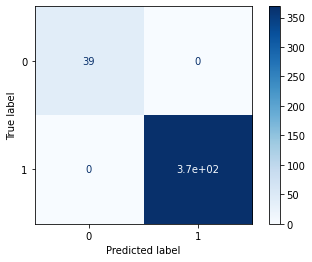

In [50]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt_model, X_train_transform_df, y_train, cmap = 'Blues')

In [2]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt_model, X_test_transform_df, y_test, cmap = 'Blues')

NameError: name 'dt_model' is not defined

In [52]:
print( np.unique( y_val_pred ) )

[0 1]


In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_val_pred)

0.8102189781021898

In [57]:
# What about AUROC?
prob_y_val = dt_model.predict_proba(X_val_transform_df)

In [61]:
prob_y_val

[0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [62]:
y_test_pred = dt_model.predict(X_test_transform_df)

In [63]:
recall_score(y_test, y_test_pred)

0.9338842975206612

In [44]:
explainer = shap.TreeExplainer(dt_model)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [64]:
shap_values = explainer.shap_values(X_val_transform_df)

In [65]:
shap.initjs()

In [68]:
shap.force_plot(base_value = explainer.expected_value[1],
               shap_values = shap_values[1],
               feature_names = transformed_columns)

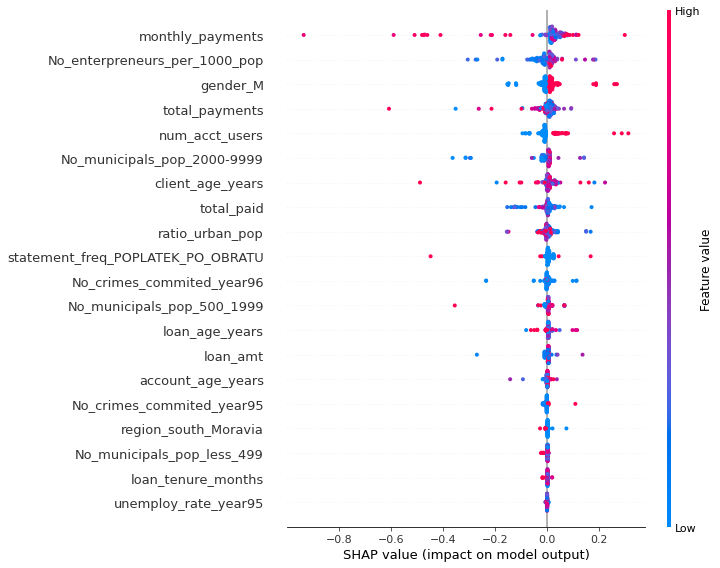

In [69]:
#summary plot for 1 - approved
shap.summary_plot(shap_values[1],
                 X_val_transform_df,
                 feature_names = transformed_columns)

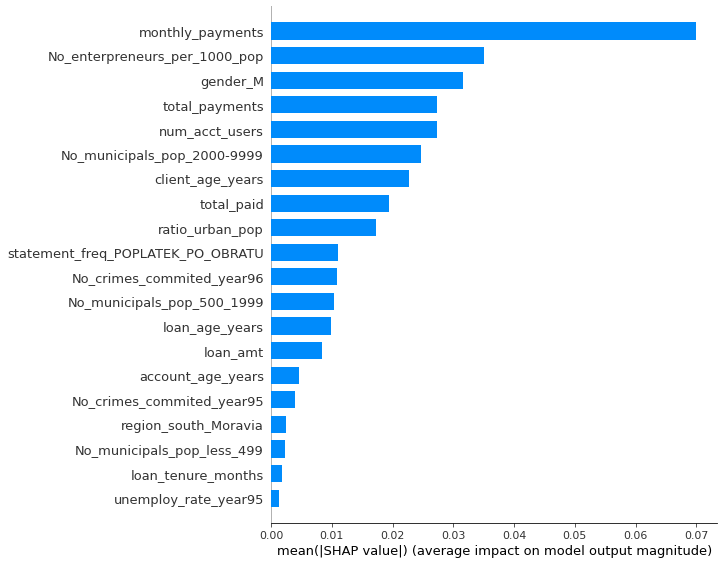

In [70]:
#summary plot for 1 - approved
shap.summary_plot(shap_values[1],
                 X_val_transform_df,
                 plot_type = 'bar')

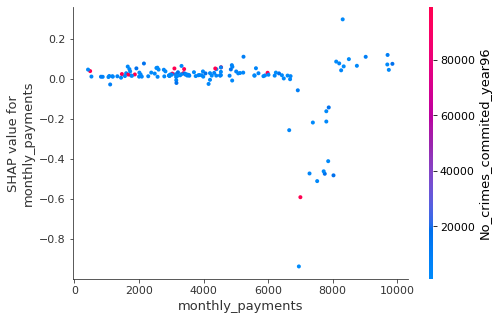

In [73]:
shap.dependence_plot('monthly_payments',
                    shap_values[1],
                    X_val_transform_df,
                    feature_names = transformed_columns,
                    )

In [78]:
# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(dt_model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainer.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [93]:
shap.force_plot(explainer.expected_value[1],
                                      shap_values[1][0],
               features = X_val_transform_df.iloc[0,:].values,
               feature_names = transformed_columns)

In [104]:
df.client_age_years.max()

65